# Importing Libraries

In [1]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.preprocessing import MinMaxScaler

import joblib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import cross_val_score

# Load Processed Test Data and Trained Models

In [2]:
rf = joblib.load(r"C:\Users\Deepak Verma\OneDrive\Documents\Loan_Default_Prediction\models\rf_model.pkl")
xgb = joblib.load(r"C:\Users\Deepak Verma\OneDrive\Documents\Loan_Default_Prediction\models\xgb_model.pkl")
lr = joblib.load(r"C:\Users\Deepak Verma\OneDrive\Documents\Loan_Default_Prediction\models\lr_model.pkl")

data = pd.read_csv(r"C:\Users\Deepak Verma\OneDrive\Documents\Loan_Default_Prediction\data\processed\loan_data_processed.csv")

data = data.dropna()

x = data.drop(columns = ["loan_status"], axis = 1)
y = data["loan_status"]

# Split for evaluate

In [3]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, stratify=y, random_state = 42)

In [4]:
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [5]:
# Predict probabilities and classes
y_pred_rf = rf.predict(x_test_scaled)
y_proba_rf = rf.predict_proba(x_test_scaled)[:, 1]

y_pred_xgb = xgb.predict(x_test_scaled)
y_proba_xgb = xgb.predict_proba(x_test_scaled)[:, 1]

y_pred_lr = lr.predict(x_test_scaled)
y_proba_lr = lr.predict_proba(x_test_scaled)[:, 1]

# Evaluate

In [6]:
print("Random Forest: \n", classification_report(y_test, y_pred_rf))
print("XGBoost: \n", classification_report(y_test, y_pred_xgb))
print("Logistic Regression: \n", classification_report(y_test, y_pred_lr))

Random Forest: 
               precision    recall  f1-score   support

           0       0.98      0.89      0.93       738
           1       0.87      0.98      0.92       543

    accuracy                           0.93      1281
   macro avg       0.92      0.93      0.93      1281
weighted avg       0.93      0.93      0.93      1281

XGBoost: 
               precision    recall  f1-score   support

           0       0.96      0.90      0.93       738
           1       0.88      0.95      0.91       543

    accuracy                           0.92      1281
   macro avg       0.92      0.92      0.92      1281
weighted avg       0.92      0.92      0.92      1281

Logistic Regression: 
               precision    recall  f1-score   support

           0       0.81      0.79      0.80       738
           1       0.72      0.75      0.73       543

    accuracy                           0.77      1281
   macro avg       0.76      0.77      0.77      1281
weighted avg       0.77

# Key Performance Area

In [7]:
importances_rf = pd.Series(rf.feature_importances_, index=x.columns).sort_values(ascending=False)
importances_xgb = pd.Series(xgb.feature_importances_, index=x.columns).sort_values(ascending=False)
print("\nTop KPAs (Random Forest):")
print(importances_rf.head())
print("\nTop KPAs (XGBoost):")
print(importances_xgb.head())


Top KPAs (Random Forest):
cibil_score               0.406374
loan_amount_in_lakhs      0.121475
education                 0.098530
annual_income_in_lakhs    0.094354
debt_to_income_ratio      0.082756
dtype: float64

Top KPAs (XGBoost):
cibil_score               0.681867
education                 0.127559
self_employed             0.041736
annual_income_in_lakhs    0.041464
loan_amount_in_lakhs      0.034634
dtype: float32


# Visualize Feature Importance

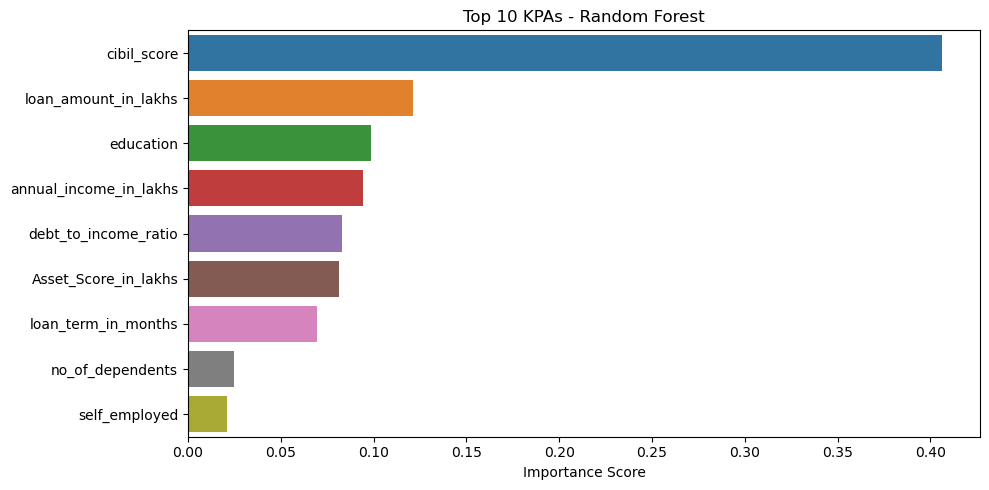

In [8]:
plt.figure(figsize=(10, 5))
sns.barplot(x=importances_rf.values[:10], y=importances_rf.index[:10])
plt.title("Top 10 KPAs - Random Forest")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.savefig(r"C:\Users\Deepak Verma\OneDrive\Documents\Loan_Default_Prediction\outputs\figures\Top_10_KPAs-Random_Forest.png")
plt.show()

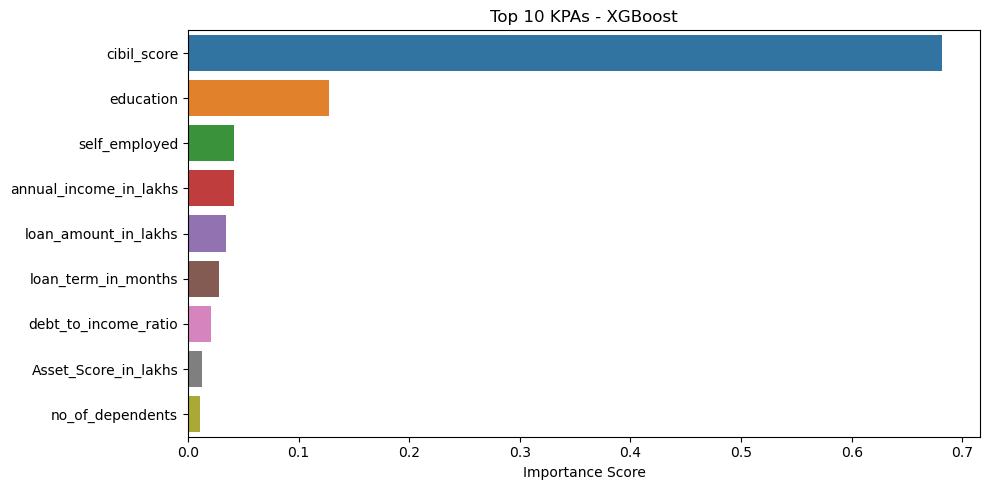

In [9]:
plt.figure(figsize=(10, 5))
sns.barplot(x=importances_xgb.values[:10], y=importances_xgb.index[:10])
plt.title("Top 10 KPAs - XGBoost")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.savefig(r"C:\Users\Deepak Verma\OneDrive\Documents\Loan_Default_Prediction\outputs\figures\Top_10_KPAs-XGBoost.png")
plt.show()

# Evaluation Metrics

In [10]:
def evaluate_model(y_true, y_pred, y_proba, model_name="Model"):
    print(f"--- {model_name} ---")
    print("Accuracy :", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall   :", recall_score(y_true, y_pred))
    print("F1 Score :", f1_score(y_true, y_pred))
    print("ROC AUC  :", roc_auc_score(y_true, y_proba))
    print("\nClassification Report:\n", classification_report(y_true, y_pred))

evaluate_model(y_test, y_pred_rf, y_proba_rf, "Random Forest")
evaluate_model(y_test, y_pred_xgb, y_proba_xgb, "XGBoost")
evaluate_model(y_test, y_pred_lr, y_proba_lr, "Logistic Regression")

--- Random Forest ---
Accuracy : 0.927400468384075
Precision: 0.8664495114006515
Recall   : 0.9797421731123389
F1 Score : 0.9196197061365601
ROC AUC  : 0.9588430230526983

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.89      0.93       738
           1       0.87      0.98      0.92       543

    accuracy                           0.93      1281
   macro avg       0.92      0.93      0.93      1281
weighted avg       0.93      0.93      0.93      1281

--- XGBoost ---
Accuracy : 0.9203747072599532
Precision: 0.8756388415672913
Recall   : 0.9465930018416207
F1 Score : 0.9097345132743363
ROC AUC  : 0.9609915804498744

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.90      0.93       738
           1       0.88      0.95      0.91       543

    accuracy                           0.92      1281
   macro avg       0.92      0.92      0.92      1281
weighted avg  

# Confusion Matrix Visualization

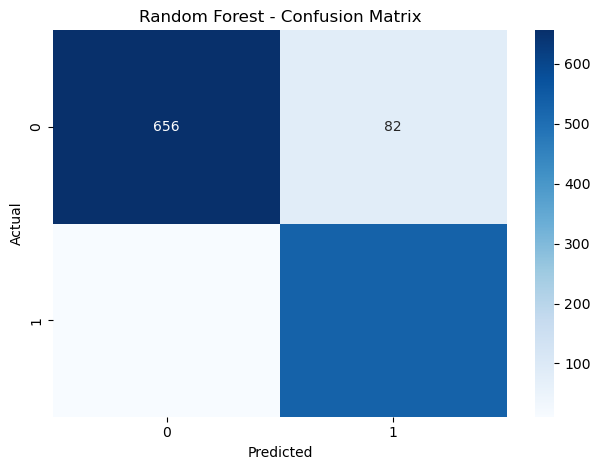

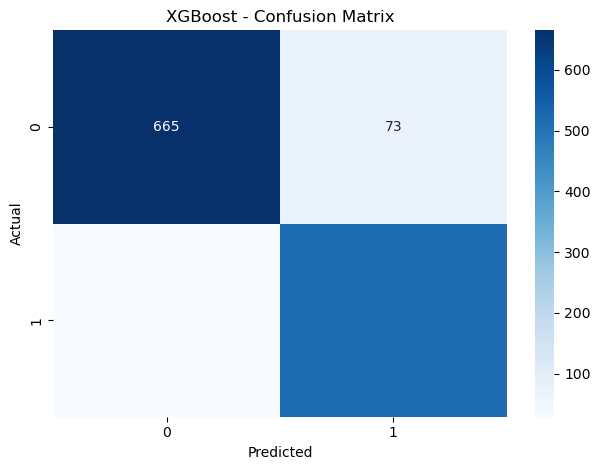

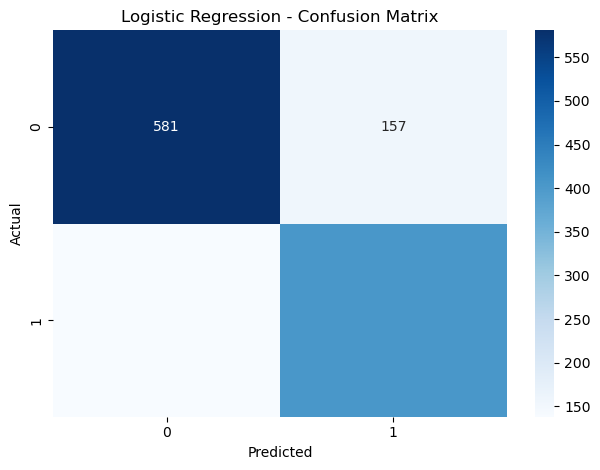

In [11]:
def plot_conf_matrix(y_true, y_pred, model_name="Model"):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

plot_conf_matrix(y_test, y_pred_rf, "Random Forest")
plot_conf_matrix(y_test, y_pred_xgb, "XGBoost")
plot_conf_matrix(y_test, y_pred_lr, "Logistic Regression")

# ROC Curve

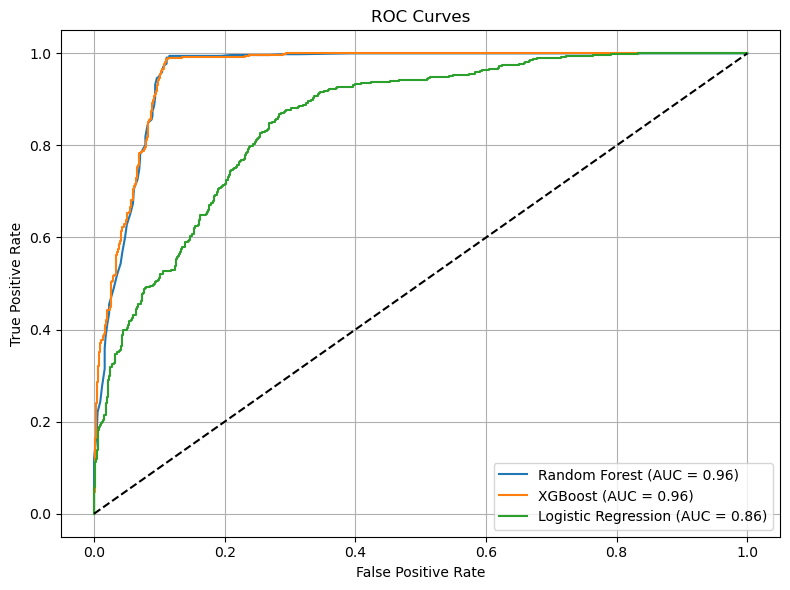

In [12]:
def plot_roc(y_true, y_proba, model_name="Model"):
    fpr, tpr, _ = roc_curve(y_true, y_proba)
    auc_score = roc_auc_score(y_true, y_proba)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.2f})')

plt.figure(figsize=(8, 6))
plot_roc(y_test, y_proba_rf, "Random Forest")
plot_roc(y_test, y_proba_xgb, "XGBoost")
plot_roc(y_test, y_proba_lr, "Logistic Regression")
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig(r"C:\Users\Deepak Verma\OneDrive\Documents\Loan_Default_Prediction\outputs\figures\ROC_Curves.png")
plt.show()

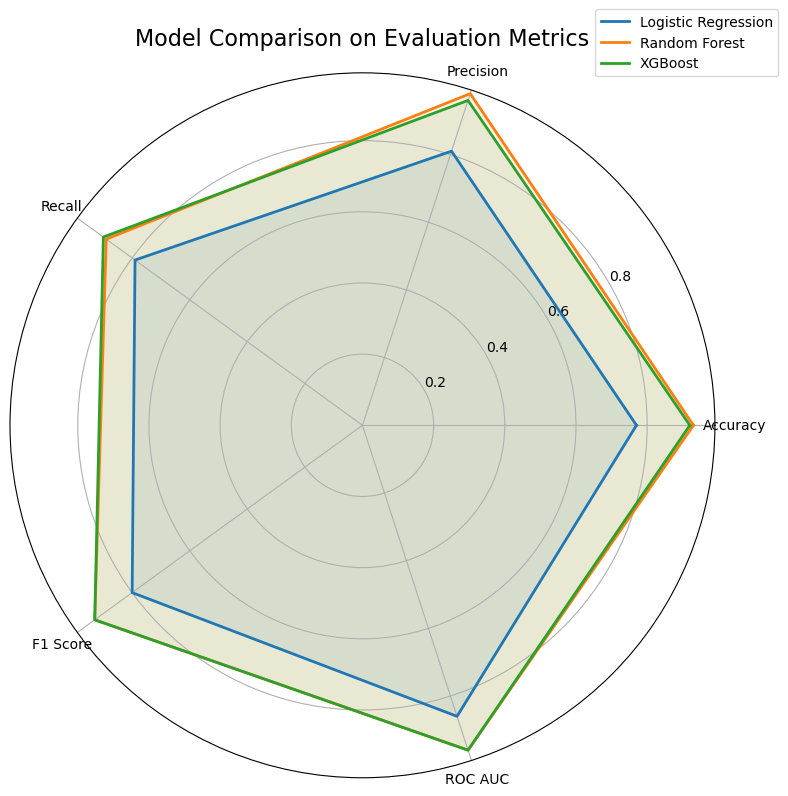

In [13]:
models_1 = ['Logistic Regression', 'Random Forest', 'XGBoost']
metrics_1 = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']

# Values for each model (normalized between 0 and 1 or in % if you prefer)
scores = {
    'Logistic Regression': [0.77, 0.81, 0.79, 0.80, 0.86],
    'Random Forest':       [0.93, 0.98, 0.89, 0.93, 0.96],
    'XGBoost':             [0.92, 0.96, 0.90, 0.93, 0.96]
}

# Radar chart setup
num_metrics = len(metrics_1)
angles = np.linspace(0, 2 * np.pi, num_metrics, endpoint=False).tolist()
angles += angles[:1]  # Complete the loop

# Create figure
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Plot each model
for model_1, values in scores.items():
    values += values[:1]  # Loop back to the start
    ax.plot(angles, values, label=model_1, linewidth=2)
    ax.fill(angles, values, alpha=0.1)

# Set the labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(metrics_1)
ax.set_title('Model Comparison on Evaluation Metrics', size=16, pad=20)
ax.set_rlabel_position(30)
ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

plt.tight_layout()
plt.savefig(r"C:/Users/Deepak Verma/OneDrive/Documents/Loan_Default_Prediction/outputs/figures/reports_1.png")
plt.show()

# Save Evaluation Report to Text File

In [14]:
with open(r"C:\Users\Deepak Verma\OneDrive\Documents\Loan_Default_Prediction\outputs\evaluation_report.txt", 'w') as f:
    f.write("===== Random Forest =====\n")
    f.write(classification_report(y_test, y_pred_rf))
    f.write("\n===== XGBoost =====\n")
    f.write(classification_report(y_test, y_pred_xgb))
    f.write("===== Logistic Regression =====\n")
    f.write(classification_report(y_test, y_pred_lr))